In [1]:
%matplotlib notebook
DEFAULT_FIGSIZE = (8, 6)
#%matplotlib inline 
#DEFAULT_FIGSIZE = (12, 8)

import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import plot_sim as ps

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

In [2]:
log = ps.ProcessedRecord('logs/multisine.pb.cobs.gz')

In [3]:
# calculate upper and lower masses
accel = scipy.signal.savgol_filter(log.measured_steer_angle, 101, 3, 2, 0.001)
torque1 = ps.get_kistler_sensor_torque(log.records.sensors.kistler_measured_torque)
torque2 = -torque1 + ps.get_kollmorgen_applied_torque(log.records.sensors.kollmorgen_actual_torque)


m1 = np.linalg.lstsq(accel.reshape((-1, 1)), torque1.reshape((-1, 1)))[0][0][0]
print('least-squares fit for upper inertia {} kg-m^2'.format(m1))

m2 = np.linalg.lstsq(accel.reshape((-1, 1)), torque2.reshape((-1, 1)))[0][0][0]
print('least-squares fit for lower inertia {} kg-m^2'.format(m2))

least-squares fit for upper inertia 0.03185004118699606 kg-m^2
least-squares fit for lower inertia 0.010860690708980467 kg-m^2


<IPython.core.display.Javascript object>


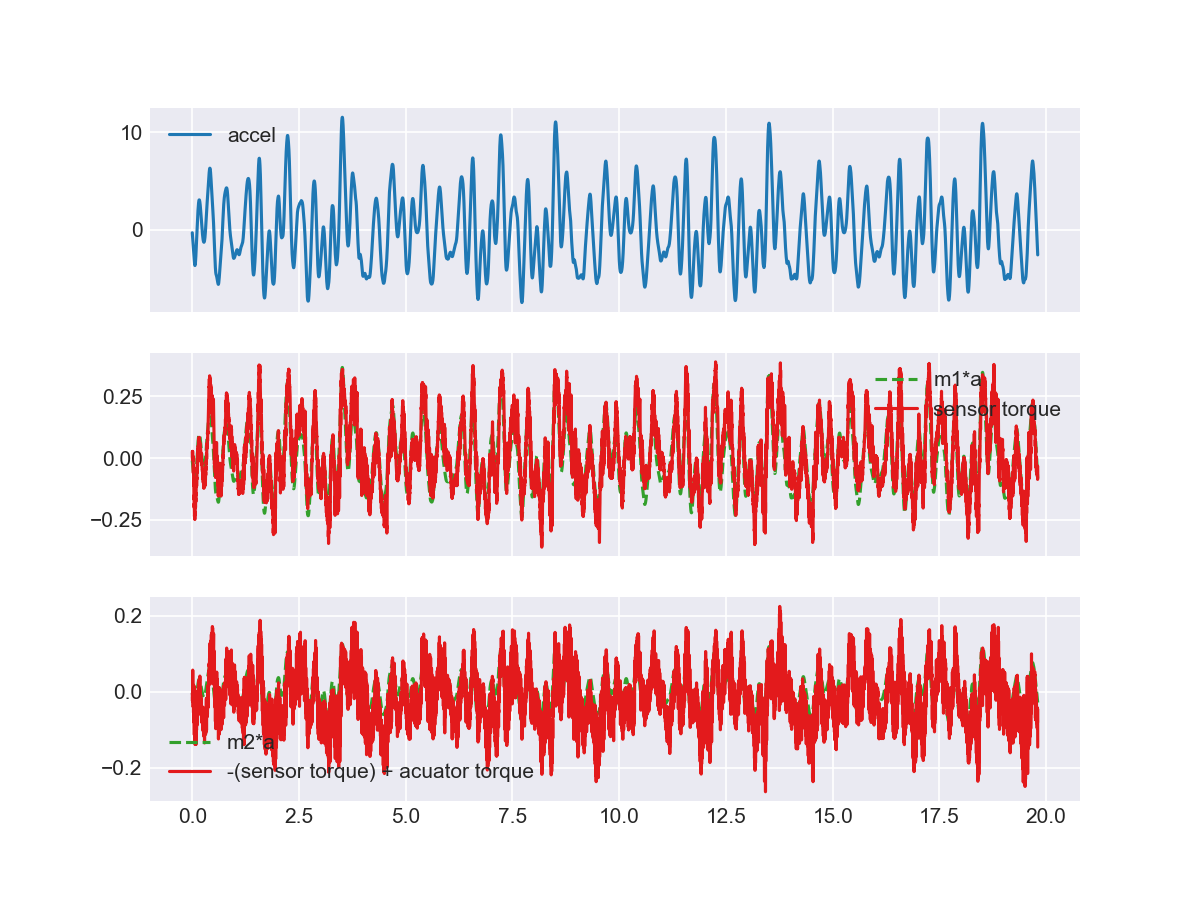

In [4]:
color = sns.color_palette('Paired', 12)[1::2]

plt.close('all')
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(log.t, accel,
           color=color[0],
           label='accel')
ax[0].legend()

ax[1].plot(log.t, accel * m1,
           color=color[1], linestyle='--',
           label='m1*a')
ax[1].plot(log.t, torque1,
           color=color[2],
           label='sensor torque')
ax[1].legend()


ax[2].plot(log.t, accel * m2,
           color=color[1], linestyle='--',
           label='m2*a')
ax[2].plot(log.t, torque2,
           color=color[2],
           label='-(sensor torque) + acuator torque')
ax[2].legend()

plt.show()